In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data

In [2]:
df_customer = pd.read_csv('twm_customer.csv', sep=';')
df_customer.head(5)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
print(df_customer.shape)
print(df_customer.isnull().sum())
print('# of unique customer IDs: ', df_customer['cust_id'].nunique())

(747, 15)
cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64
# of unique customer IDs:  747


In [4]:
df_accounts = pd.read_csv('twm_accounts.csv', sep=';')
df_accounts.head(5)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [5]:
print(df_accounts.shape)
print(df_accounts.isnull().sum())
print('# of unique customer IDs: ', df_accounts['cust_id'].nunique())
# Customers can have multiple accounts.

(1409, 8)
acct_nbr               0
cust_id                0
acct_type              0
account_active         0
acct_start_date        0
acct_end_date       1266
starting_balance       0
ending_balance         0
dtype: int64
# of unique customer IDs:  665


In [6]:
df_checking_acct = pd.read_csv('twm_checking_acct.csv', sep=';')
df_checking_acct.head(5)

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [7]:
print(df_checking_acct.shape)
print(df_checking_acct.isnull().sum())
print('# of unique customer IDs: ', df_checking_acct['acct_nbr'].nunique())

(520, 9)
cust_id               0
acct_nbr              0
minimum_balance       0
per_check_fee         0
account_active        0
acct_start_date       0
acct_end_date       468
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  520


In [8]:
df_credit_acct = pd.read_csv('twm_credit_acct.csv', sep=';')
df_credit_acct.head(5)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [9]:
print(df_credit_acct.shape)
print(df_credit_acct.isnull().sum())
print('# of unique customer IDs: ', df_credit_acct['cust_id'].nunique())

(468, 9)
cust_id               0
acct_nbr              0
credit_limit          0
credit_rating         0
account_active        0
acct_start_date       0
acct_end_date       423
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  468


In [10]:
df_savings_acct = pd.read_csv('twm_savings_acct.csv', sep=';')
df_savings_acct.head(5)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [11]:
print(df_savings_acct.shape)
print(df_savings_acct.isnull().sum())
print('# of unique customer IDs: ', df_savings_acct['cust_id'].nunique())

(421, 9)
cust_id               0
acct_nbr              0
minimum_balance       0
acct_type             0
account_active        0
acct_start_date       0
acct_end_date       375
starting_balance      0
ending_balance        0
dtype: int64
# of unique customer IDs:  421


In [12]:
df_transactions = pd.read_csv('twm_transactions.csv', sep=';')
df_transactions.head(5)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [13]:
print(df_transactions.shape)
print(df_transactions.isnull().sum())
print('# of ACCOUNT numbers: ', df_transactions['acct_nbr'].nunique())

(77580, 10)
tran_id          0
acct_nbr         0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of ACCOUNT numbers:  1398


In [14]:
df_checking_tran = pd.read_csv('twm_checking_tran.csv', sep=';')
df_checking_tran.head(5)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [15]:
print(df_checking_tran.shape)
print(df_checking_tran.isnull().sum())
print('# of unique customer IDs: ', df_checking_tran['cust_id'].nunique())

(46204, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  520


In [16]:
df_credit_tran = pd.read_csv('twm_credit_tran.csv', sep=';')
df_credit_tran.head(5)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


In [17]:
print(df_credit_tran.shape)
print(df_credit_tran.isnull().sum())
print('# of unique customer IDs: ', df_credit_tran['cust_id'].nunique())

(20167, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  457


In [18]:
df_savings_tran = pd.read_csv('twm_savings_tran.csv', sep=';')
df_savings_tran.head(5)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [19]:
print(df_savings_tran.shape)
print(df_savings_tran.isnull().sum())
print('# of unique customer IDs: ', df_savings_tran['cust_id'].nunique())

(11189, 10)
cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64
# of unique customer IDs:  420


# Analysis

Customer segmentation based on demographics:

In [20]:
df_customer.head(5)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [21]:
scaler = StandardScaler()
df_customer_scaled = pd.DataFrame(scaler.fit_transform(df_customer.iloc[:,1:3].astype(float)))
X = df_customer_scaled.to_numpy()

In [22]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

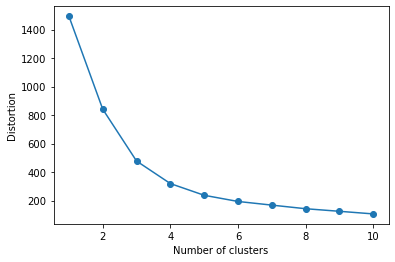

In [23]:
# elbow rule
plot_distortion(X,max_clusters=10)

In [24]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)
y_km = km.fit_predict(X)

In [25]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, y, s=50, marker='s', label = f'cluster {cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids, Y_centroids, marker = '*', c = 'red', s = 250, label = 'centroids')
    
    plt.legend()
    plt.grid()
    plt.show()

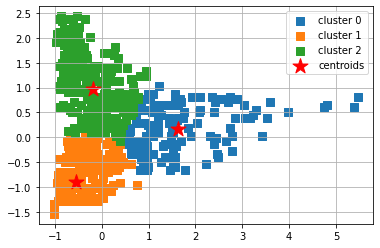

In [26]:
# Income, Age
plot_clusters(X, y_km, plt_cluster_centers = True)

In [27]:
df_cust_accounts = pd.merge(df_customer,df_accounts,on='cust_id')[['cust_id','income','age','gender','nbr_children','marital_status',
                                                                   'acct_nbr','acct_type','acct_end_date',
                                                                   'ending_balance']]
df_cust_accounts.head()

,cust_id,income,age,gender,nbr_children,marital_status,acct_nbr,acct_type,acct_end_date,ending_balance
0,1362487,6605,71,M,0,2,4561143213624870,CC,NaN,1548.23
1,1362487,6605,71,M,0,2,13624873,SV,25.8.1995,12.89
2,1362487,6605,71,M,0,2,13624872,CK,NaN,1401.21
3,1363160,18548,38,F,0,1,4561143213631600,CC,NaN,286.69
4,1363160,18548,38,F,0,1,13631603,SV,NaN,122.54


In [28]:
df_cust_accounts['acct_type'].value_counts()
#CC = credit
#CK = checking
#SV = savings
df_cust_accounts['credit_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CC  ']
df_cust_accounts['checking_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CK  ']
df_cust_accounts['savings_balance'] = df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='SV  ']

In [29]:
#df_cust_accounts['ending_balance'][df_cust_accounts['acct_type']=='CK  ']
df_cust_info = df_cust_accounts.loc[:,~df_cust_accounts.columns.isin(['acct_nbr','ending_balance','acct_end_date','acct_type'])]
df_cust_info = df_cust_info.groupby(['cust_id','income','age','gender','nbr_children','marital_status']).sum().reset_index()
df_cust_info['total_balance'] = df_cust_info['checking_balance']+df_cust_info['savings_balance']-df_cust_info['credit_balance']
df_cust_info[df_cust_info['cust_id']==1362480]
#df_cust_info.head()

,cust_id,income,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,total_balance
0,1362480,50890,33,M,2,2,20.0,86.86,1187.97,1254.83


In [30]:
df_n = df_cust_accounts[['cust_id','acct_type','acct_nbr']].groupby(['cust_id','acct_type']).count()
df_n[df_n['acct_nbr']>1]

,,acct_nbr
cust_id,acct_type,


In [31]:
df_accounts[df_accounts['cust_id'] == 1362480]

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
1012,13624802,1362480,CK,Y,23.12.1992,NaN,331.85,86.86
1217,4561143213624800,1362480,CC,N,23.12.1992,15.12.1995,1607.40,20.00
1399,13624803,1362480,SV,Y,23.12.1992,NaN,707.09,1187.97


In [32]:
df_sv_counts = df_savings_tran[['cust_id','tran_id']].groupby('cust_id').count().reset_index()
df_cc_counts = df_credit_tran[['cust_id','tran_id']].groupby('cust_id').count().reset_index()
df_ck_counts = df_checking_tran[['cust_id','tran_id']].groupby('cust_id').count().reset_index()

In [33]:
df_cust_info

,cust_id,income,age,gender,nbr_children,marital_status,credit_balance,checking_balance,savings_balance,total_balance
0,1362480,50890,33,M,2,2,20.00,86.86,1187.97,1254.83
1,1362484,10053,42,F,0,1,369.72,95.32,2122.17,1847.77
2,1362485,22690,25,F,0,1,1100.00,45.49,0.00,-1054.51
3,1362486,10701,76,F,0,3,0.00,3312.27,116.24,3428.51
4,1362487,6605,71,M,0,2,1548.23,1401.21,12.89,-134.13
...,...,...,...,...,...,...,...,...,...,...
660,1363490,0,15,F,0,1,0.00,0.00,2301.53,2301.53
661,1363491,0,14,M,0,1,0.00,0.00,17.82,17.82
662,1363492,142274,54,M,0,3,6869.00,106.14,1116.10,-5646.76
663,1363493,30068,69,M,0,2,0.00,2053.90,553.61,2607.51
